In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
import os
import json
import random

In [18]:
path='E:\ECG Analysis\Dataset'
MI = list() #Myocardial Infraction
HC = list() #Health control

In [31]:
flag=0
for folders in os.listdir(path):
    patient_folder=os.path.join(path, folders)
    for files in os.listdir(patient_folder):
        if 'json' in files:
            f = open(os.path.join(patient_folder, files))
            meta_data = json.load(f)
            if meta_data["Diagnosis"] == "Myocardial infarction":
                flag=1
            elif meta_data["Diagnosis"] == "Healthy control":
                flag=2
            else:
                flag=3
        else:
            if flag==1:
                MI.append(os.path.join(patient_folder, files))
            elif flag==2:
                HC.append(os.path.join(patient_folder, files))
            break

In [65]:
patients=random.sample(MI,5)
healthy=random.sample(HC,5)

In [73]:
def compare_graphs(patients,healthy,lead):
    for i,j in zip(patients,healthy):
        data=pd.read_csv(i, index_col=0)
        data_clean=nk.ecg_clean(data[lead])
        plt.subplot(1, 2, 1)
        Heart_Beat_Wave=nk.ecg_segment(data_clean[:10000], show=True)
        plt.title('Myocardial Infraction')

        healthy_data=pd.read_csv(j, index_col=0)
        clean_healthy_data=nk.ecg_clean(healthy_data[lead])
        plt.subplot(1, 2, 2)
        graph=nk.ecg_segment(clean_healthy_data[:10000], show=True)
        plt.title('Health Control')
        plt.show()

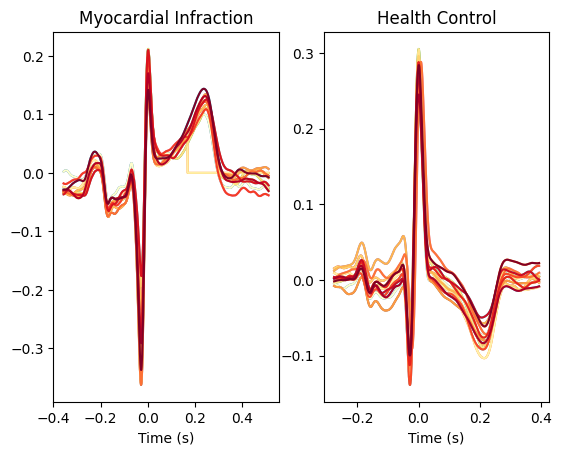

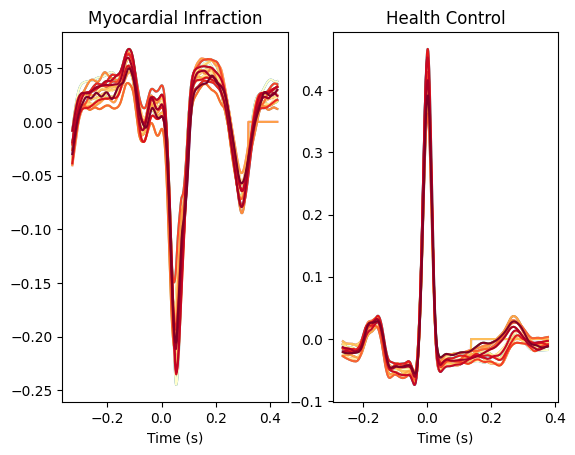

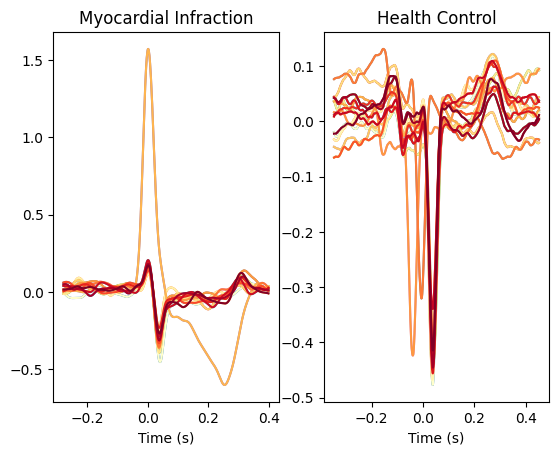

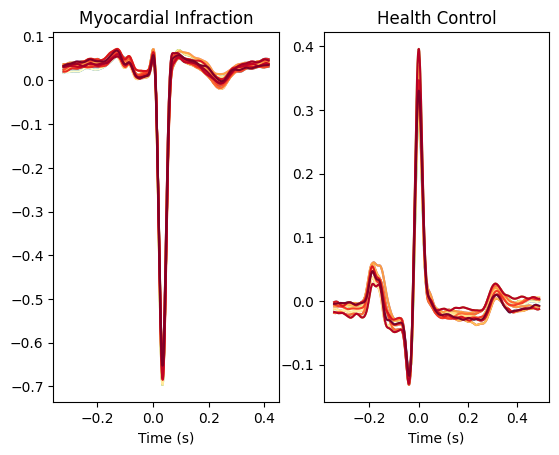

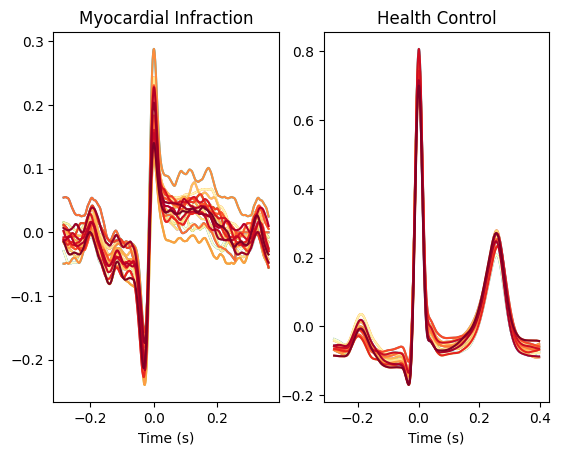

In [74]:
compare_graphs(patients,healthy,'iii')

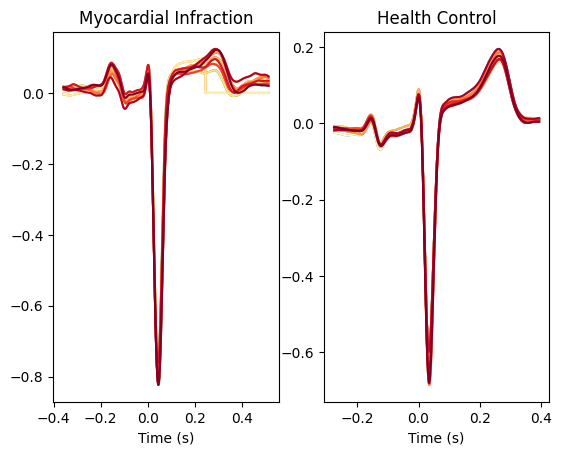

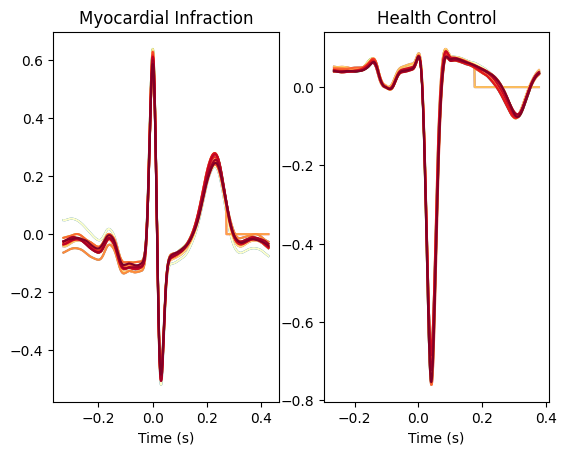

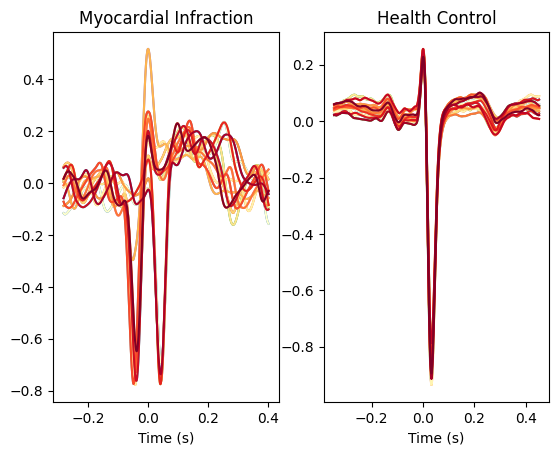

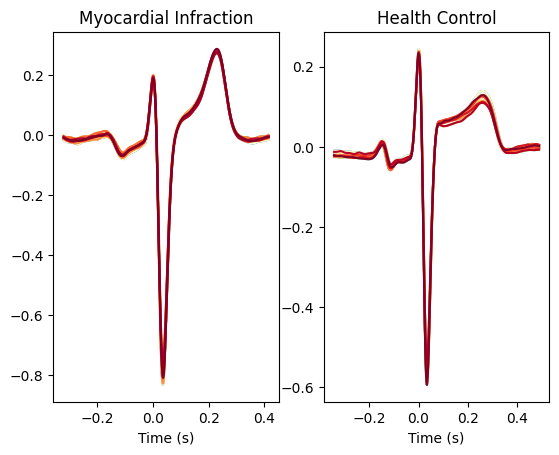

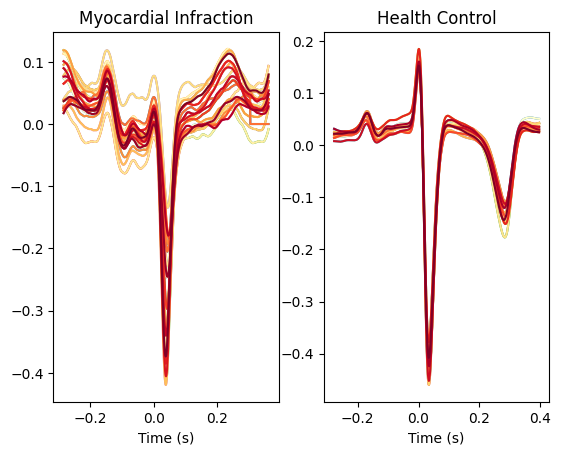

In [70]:
compare_graphs(patients,healthy,'v1')

In [2]:
path_to_data='E:\ECG Analysis\Dataset\patient006\s0022lre.csv'
data=pd.read_csv(path_to_data, index_col=0)

In [3]:
data

,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6,vx,vy,vz
0,-0.3825,-0.5730,-0.1905,0.4775,-0.0960,-0.3815,0.4720,0.4035,0.3655,0.1535,0.3030,-0.0010,-0.0140,-1.0105,-0.2005
1,-0.3875,-0.5840,-0.1960,0.4855,-0.0955,-0.3900,0.4825,0.4015,0.3625,0.1515,0.3025,-0.0040,-0.0185,-1.0115,-0.2050
2,-0.3790,-0.5835,-0.2045,0.4810,-0.0870,-0.3940,0.4885,0.4105,0.3710,0.1605,0.3105,0.0040,-0.0160,-1.0180,-0.2035
3,-0.3830,-0.5885,-0.2055,0.4855,-0.0885,-0.3970,0.4935,0.4190,0.3775,0.1685,0.3170,0.0085,-0.0135,-1.0290,-0.2005
4,-0.3860,-0.5855,-0.1995,0.4855,-0.0930,-0.3925,0.4890,0.4175,0.3770,0.1715,0.3175,0.0100,-0.0125,-1.0290,-0.2030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115169,-0.5685,0.5790,1.1475,-0.0055,-0.8580,0.8630,-1.0575,-1.0455,-1.0525,-0.7810,-0.9515,-0.2890,-0.3020,1.6345,0.0515
115170,-0.5725,0.5715,1.1435,0.0000,-0.8580,0.8575,-1.0470,-1.0420,-1.0485,-0.7780,-0.9500,-0.2870,-0.3035,1.6335,0.0525
115171,-0.5740,0.5630,1.1375,0.0055,-0.8555,0.8505,-1.0445,-1.0385,-1.0450,-0.7740,-0.9460,-0.2825,-0.3045,1.6235,0.0545
115172,-0.5725,0.5595,1.1320,0.0065,-0.8520,0.8460,-1.0455,-1.0350,-1.0440,-0.7700,-0.9425,-0.2790,-0.3045,1.6160,0.0545


In [4]:
data_clean=nk.ecg_clean(data['v3'])

In [5]:
data_clean

array([ 0.0552995 ,  0.05770091,  0.06012232, ..., -0.00291745,
       -0.00231071, -0.00170612])

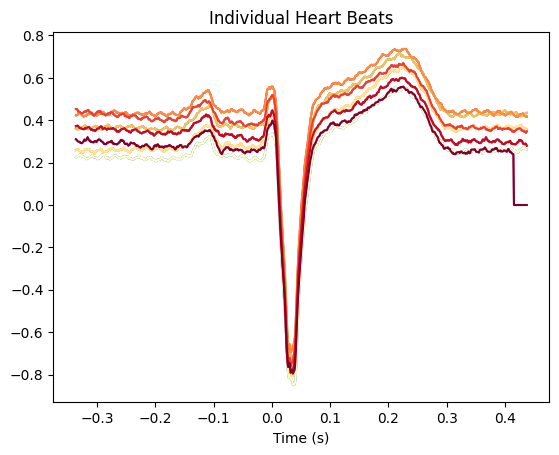

In [6]:
Heart_Beat_Wave=nk.ecg_segment(data['v3'][:5000], show=True)

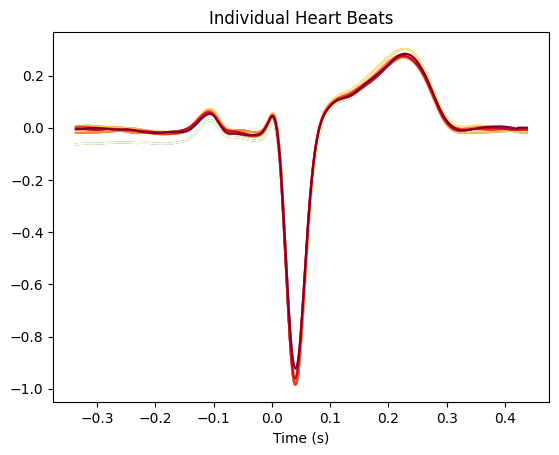

In [7]:
Heart_Beat_Wave=nk.ecg_segment(data_clean[:5000], show=True)

In [9]:
healthy_data=pd.read_csv('E:\ECG Analysis\Dataset\patient166\s0275lre.csv', index_col=0)

In [10]:
clean_healthy_data=nk.ecg_clean(healthy_data['v3'])

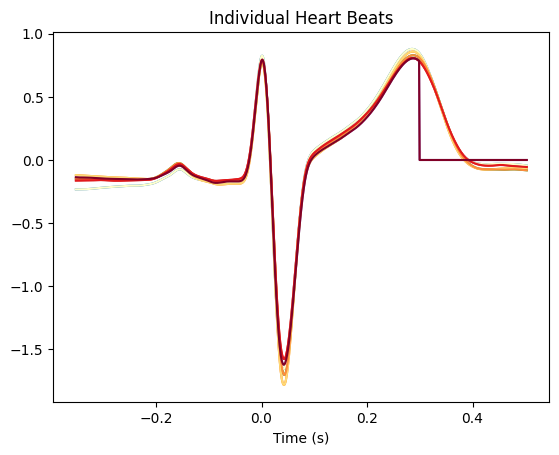

In [13]:
graph=nk.ecg_segment(clean_healthy_data[:5000], show=True)